# Climate vs EV_sales

In [91]:
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.mlab as mlab
from mpmath import norm
import matplotlib
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import norm

In [92]:
path_EV = '../Processed_Data/Ev_sales.csv'
path_climate = '../Processed_Data/climate_state.csv'
path_income = '../Processed_Data/incomes.csv'

In [93]:
df_EV = pd.read_csv(path_EV).sort_values('State').set_index('State').drop(columns=['Unnamed: 0'])
df_climate = pd.read_csv(path_climate).drop(columns=['Unnamed: 0'])
df_income = pd.read_csv(path_income).sort_values('GeoName').set_index('GeoName').drop(columns=['Unnamed: 0'])

In [94]:
col = ['State','temp','EV_sale']
data = pd.DataFrame(columns = col)
data['State']=df_income.index
data = data.set_index('State')
data['temp'] = df_climate.iloc[29]
data['EV_sale']=df_EV['2019']
data = data.drop(['District of Columbia','Hawaii','Kansas'])
data.head()

,temp,EV_sale
State,,
Alabama,65.4,1007
Alaska,32.2,143
Arizona,60.3,7591
Arkansas,61.2,538
California,58.4,145020


In [95]:
highest_sale = data.sort_values(by='EV_sale',ascending=False).index[0]
highest_temp = data.sort_values(by='temp',ascending=False).index[0]
lowest_temp = data.sort_values(by='temp',ascending=True).index[0]
highest_sale, highest_temp, lowest_temp

('California', 'Florida', 'Alaska')

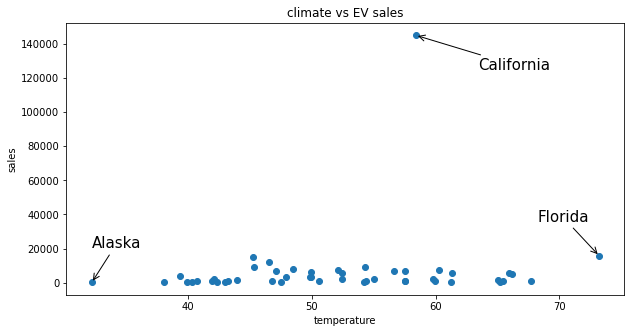

In [96]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.ticklabel_format(style='plain')
plt.scatter(data['temp'],data['EV_sale'])

plt.annotate(highest_sale, xy = (data.loc[highest_sale][['temp', 'EV_sale']]), xytext = data.loc[highest_sale][['temp', 'EV_sale']] +(+5, -20000), fontsize=15, 
            arrowprops=dict(arrowstyle='->')
            )
plt.annotate(highest_temp, xy = (data.loc[highest_temp][['temp', 'EV_sale']]), xytext = data.loc[highest_temp][['temp', 'EV_sale']] +(-5, +20000), fontsize=15, 
            arrowprops=dict(arrowstyle='->')
            )
plt.annotate(lowest_temp, xy = (data.loc[lowest_temp][['temp', 'EV_sale']]), xytext = data.loc[lowest_temp][['temp', 'EV_sale']] +(-0, +20000), fontsize=15, 
            arrowprops=dict(arrowstyle='->')
            )

plt.title("climate vs EV sales")
plt.xlabel("temperature")
plt.ylabel("sales")
plt.show()

In [97]:
data = data.drop(highest_sale)
data = data.drop(highest_temp)
data = data.drop(lowest_temp)

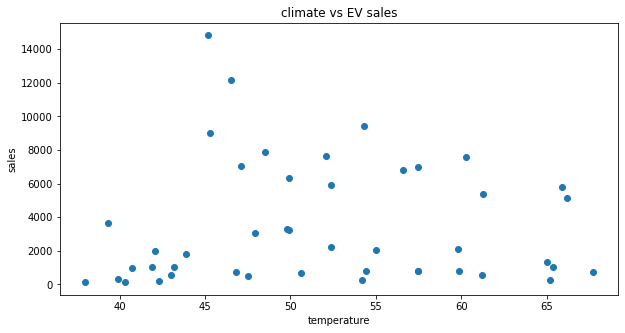

In [98]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.ticklabel_format(style='plain')
plt.scatter(data['temp'],data['EV_sale'])
plt.title("climate vs EV sales")
plt.xlabel("temperature")
plt.ylabel("sales")
plt.show()

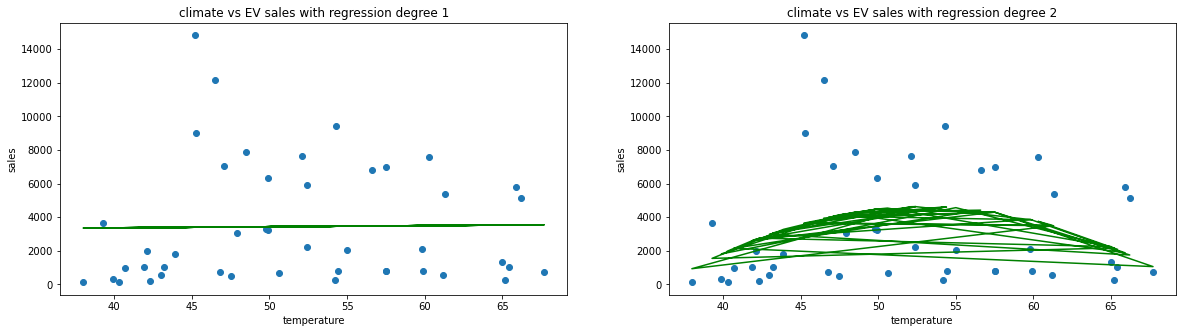

In [99]:
fig, ax = plt.subplots(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.title("climate vs EV sales with regression degree 1")
plt.xlabel("temperature")
plt.ylabel("sales")
parameter = np.polyfit(data['temp'], data['EV_sale'],1)
p = np.poly1d(parameter)
plt.scatter(data['temp'], data['EV_sale'])
plt.plot(data['temp'],p(data['temp']),color='g')

plt.subplot(1, 2, 2)
plt.title("climate vs EV sales with regression degree 2")
plt.xlabel("temperature")
plt.ylabel("sales")
parameter = np.polyfit(data['temp'], data['EV_sale'],2)
p = np.poly1d(parameter)
plt.scatter(data['temp'], data['EV_sale'])
plt.plot(data['temp'],p(data['temp']),color='g')

plt.show()

In [100]:
data.head()

,temp,EV_sale
State,,
Alabama,65.4,1007
Arizona,60.3,7591
Arkansas,61.2,538
Colorado,45.3,9007
Connecticut,49.8,3310


In [101]:
data["temp"] = pd.to_numeric(data["temp"],errors='coerce')

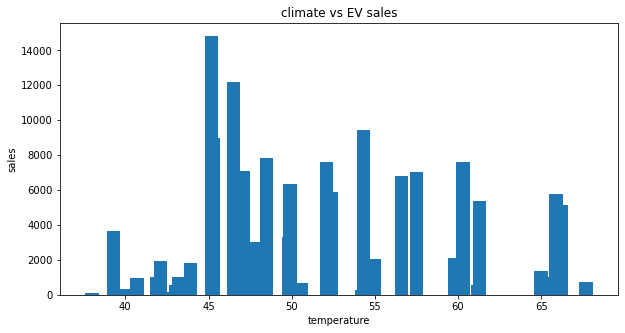

In [102]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(data['temp'],data['EV_sale'])
plt.title("climate vs EV sales")
plt.xlabel("temperature")
plt.ylabel("sales")
plt.show()

In [103]:
col = ['Climate','EV_sale']
df = pd.DataFrame(columns = col)
df['Climate'] =  ['cold','cool','warm','hot']
for index, row in df.iterrows():
    if df.iloc[index,0] == 'cold':
        df.iloc[index,1] = data[(data['temp']<= 40)]['EV_sale'].sum()
    if df.iloc[index,0] == 'cool':
        df.iloc[index,1] = data[((data['temp']>= 40) & (data['temp']<50))]['EV_sale'].sum()
    if df.iloc[index,0] == 'warm':
        df.iloc[index,1] = data[((data['temp']>= 50) & (data['temp']<60))]['EV_sale'].sum()
    if df.iloc[index,0] == 'hot':
        df.iloc[index,1] = data[((data['temp']>= 60) & (data['temp']<=70))]['EV_sale'].sum()
df.head()

,Climate,EV_sale
0,cold,4072
1,cool,75796
2,warm,47287
3,hot,27775


In [107]:
df

,Climate,EV_sale
0,cold,4072
1,cool,75796
2,warm,47287
3,hot,27775


In [112]:
df = df.set_index('Climate')

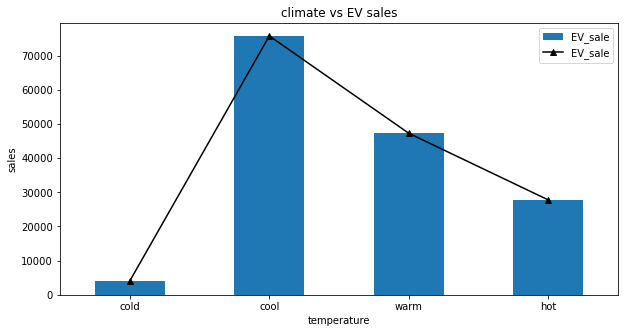

In [116]:
fig, ax = plt.subplots(figsize=(10, 5))
df.plot(kind='bar',ax=ax)
df.plot(kind='line', marker='^',ax=ax, color='black')
plt.title("climate vs EV sales")
plt.xlabel("temperature")
plt.ylabel("sales")
plt.show()